# Текстовая задача 

# Задание 2

### 2. Случайная величина имеет экспоненциальный закон распределения


\begin{equation*} 
p(x) =
\begin{cases} 
e^{-x}, & \text{если } x \geq 0, \\
0, & \text{если } x < 0.
\end{cases}
\end{equation*} 


#### a)
Сгенерируйте выборку объема \( n = 25 \).  
Определить по выборке:
- моду,  
- медиану,  
- размах,  
- оценку коэффициента асимметрии.

#### b)
Построить:
- эмпирическую функцию распределения,  
- гистограмму,  
- boxplot.

#### c)
Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью центральной предельной теоремы (ЦПТ), с бутстраповой оценкой этой плотности.

#### d)
Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициент асимметрии будет меньше 1.

#### e)
Сравнить плотность распределения медианы выборки с бутстраповой оценкой этой плотности.

In [179]:
import numpy as np
import random

def p(x: float) -> float:
    return np.exp(-x) if x >= 0 else 0

def F(x: float) -> float:
    return (1 - np.exp(-x)) if x >= 0 else 0

def F_inv(y: float) -> float:
    return -np.log(1 - y)

n = 25
arr : list = [float(F_inv(random.random())) for _ in range(n)]

arr

[0.34734549037518525,
 0.45365758541798373,
 0.9821734302859313,
 0.10293962265939166,
 0.5784446137789928,
 0.18766845860248627,
 0.9048323779717606,
 2.3552619735320643,
 0.35961665512574126,
 0.08004517697090353,
 0.2541615636362868,
 1.3405459034306788,
 3.446681529053571,
 1.5846243528205195,
 0.7169115311632762,
 1.8329900726786983,
 2.848782981775459,
 1.104968299982433,
 0.5580819073624125,
 0.4825646113299167,
 0.2376502413974675,
 0.4926289226174328,
 0.4028066076367007,
 3.2598456367698305,
 1.639566273593355]

In [180]:
def Mu_k(k : int, arr: list) -> float:
    return np.sum([(x_i - np.mean(arr))**k for x_i in arr]) / n



In [181]:
# a

var_row = sorted(arr)
# print(var_row[10:15])

moda = arr[max([(arr.count(arr[i]), i) for i in range(len(arr))])[-1]] if len(arr) != len(set(arr)) else arr
print('moda: ', moda)

span = var_row[-1] - var_row[0]
print('span: ', span)

median = var_row[n // 2]
print('median: ', median)

gamma = Mu_k(3, arr) / Mu_k(2, arr) ** 1.5
print('gamma: ', gamma)


moda:  [0.34734549037518525, 0.45365758541798373, 0.9821734302859313, 0.10293962265939166, 0.5784446137789928, 0.18766845860248627, 0.9048323779717606, 2.3552619735320643, 0.35961665512574126, 0.08004517697090353, 0.2541615636362868, 1.3405459034306788, 3.446681529053571, 1.5846243528205195, 0.7169115311632762, 1.8329900726786983, 2.848782981775459, 1.104968299982433, 0.5580819073624125, 0.4825646113299167, 0.2376502413974675, 0.4926289226174328, 0.4028066076367007, 3.2598456367698305, 1.639566273593355]
span:  3.3666363520826676
median:  0.5784446137789928
gamma:  1.182500776619659


#### b)
Построить:
- эмпирическую функцию распределения,  
- гистограмму,  
- boxplot.

In [182]:
import matplotlib.pyplot as plt

def ecdf(data):
  return data, np.arange(1, len(data) + 1) / len(data)

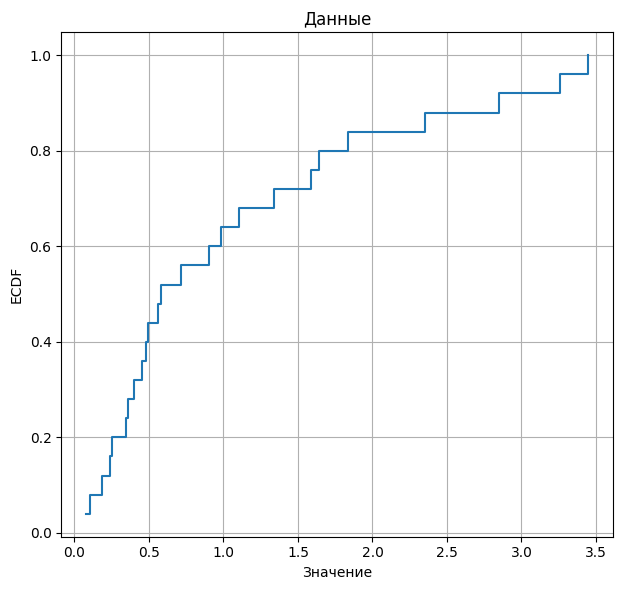

In [183]:
x_discrete, y_discrete = ecdf(var_row)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)  # Разделяем область графика на две части (1 строка, 2 столбца, 2-й подграфик)
plt.step(x_discrete, y_discrete, where='post')  # Используем ступенчатый график для дискретных данных
plt.xlabel('Значение')
plt.ylabel('ECDF')
plt.title('Данные')
plt.grid(True)


plt.tight_layout()  # Автоматическая корректировка параметров подграфиков
plt.show()

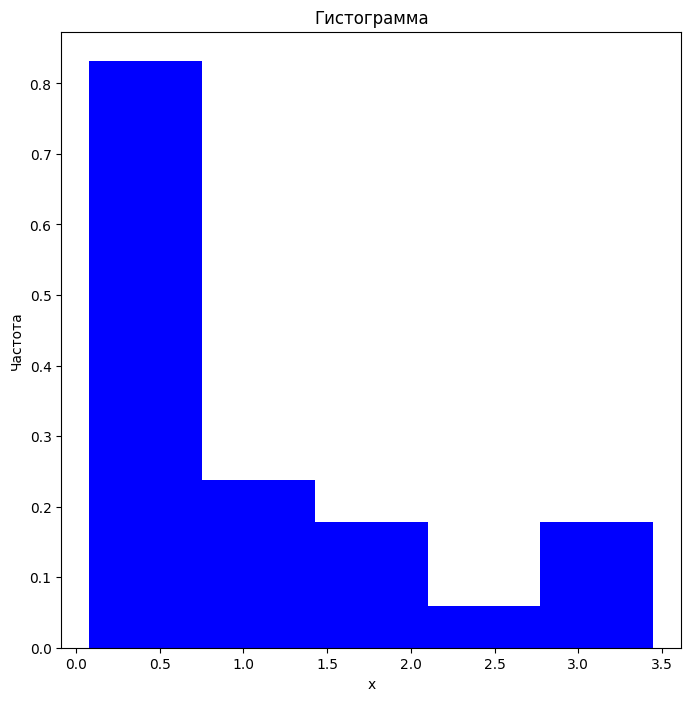

In [184]:
import seaborn as sns

# k = int(1 + np.log2(n))
# delta_i = span / k

plt.figure(figsize = (8, 8))
plt.hist(arr, bins=int(1 + np.log2(n)), color='b', density=True)
plt.xlabel('x')
plt.ylabel('Частота')
plt.title('Гистограмма')
print()

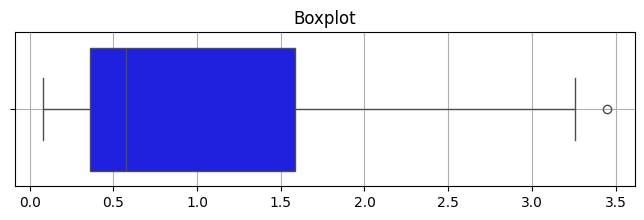

In [185]:
#boxplot

plt.figure(figsize=(8, 2))

sns.boxplot(x=var_row, color="b")

plt.title("Boxplot")
plt.grid(True)
plt.show()


#### c)
Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью центральной предельной теоремы (ЦПТ), с бутстраповой оценкой этой плотности.

$$
\mathbb{M}[\xi] 
= \int_{-\infty}^{+\infty} x \cdot \rho(x) \, dx = \int_{0}^{\infty} x \cdot p(x) \, dx = \int_{0}^{\infty} x \cdot e^{-x} \, dx = 1
$$ 

$$
\mathbb{M}[{\xi} ^2] 
= \int_{-\infty}^{+\infty} x^2 \cdot \rho(x) \, dx = \int_{0}^{\infty} x^2 \cdot p(x) \, dx = \int_{0}^{\infty} x^2 \cdot e^{-x} \, dx = 2
$$ 

$$
\mathbb{D}[\xi ^ 2] = \mathbb{M}[{\xi} ^2] - \mathbb{M}[\xi]^2 = 2 - 1^2 = 1
$$

##### ЦПТ:

$$
\frac {\overline{x} - \mathbb{M}[\xi] }{\sqrt{\mathbb{D}}} \cdot \sqrt{n}  \longmapsto N(0, 1)
$$

$$
\frac {\overline{x} - 1}{\sqrt{1}} \cdot \sqrt{25} \longmapsto N(0, 1)
$$

$$
\overline{x} \longmapsto N(1, 1/25)
$$

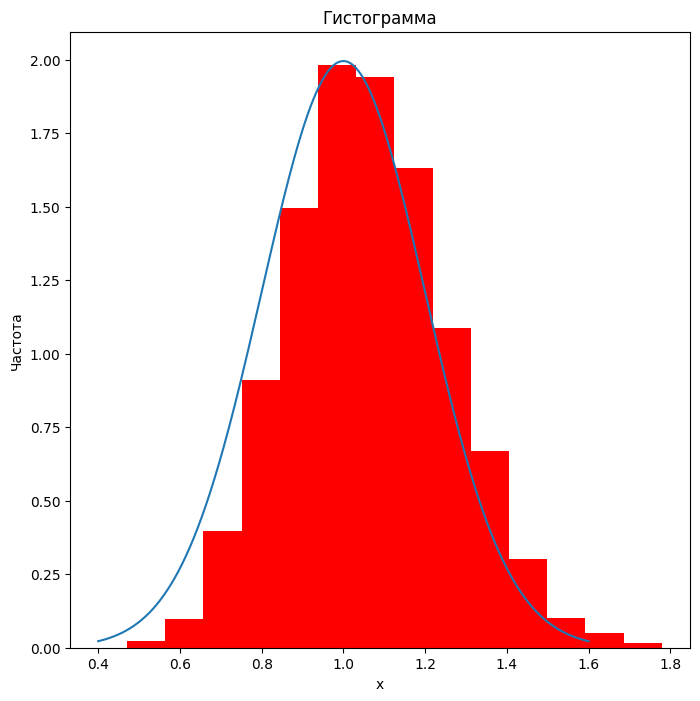

In [194]:
 # bootstrap
from scipy.stats import norm


bootstrap_iteration = 10000


bootstrap_mean = []
for _ in range(bootstrap_iteration):
    bootstrap_mean.append(np.mean(np.random.choice(arr, size=len(arr), replace=True)))


k = int(1 + np.log2(bootstrap_iteration))
delta_i = span / k


mu = 1
sigma = 1/5
x = np.linspace(mu + 3 * sigma, mu - 3 * sigma, bootstrap_iteration)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize = (8, 8))
plt.hist(bootstrap_mean, bins=int(1 + np.log2(bootstrap_iteration)), color='r', density=True)
plt.plot(x, y, label='Нормальное распределение')
plt.xlabel('x')
plt.ylabel('Частота')
plt.title('Гистограмма')
print()

#### d)
Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициент асимметрии будет меньше 1.

Оценка вероятности того, что коэффициент асимметрии будет меньше 1: 0.365


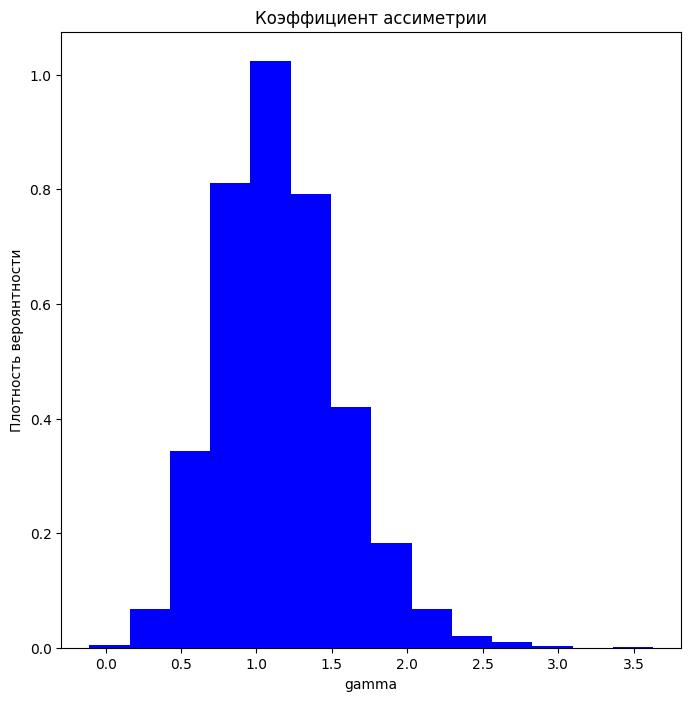

In [195]:
bootstrap_asym = []

for _ in range(bootstrap_iteration):
    generation = list(np.random.choice(arr, size=len(arr), replace=True))
    bootstrap_asym.append(Mu_k(3, generation) / (Mu_k(2, generation) ** 1.5))


plt.figure(figsize = (8, 8))
plt.hist(bootstrap_asym, bins=int(1 + np.log2(bootstrap_iteration)), color='b', density=True)
plt.xlabel('gamma')
plt.ylabel('Плотность вероянтности')
plt.title('Коэффициент ассиметрии')

print("Оценка вероятности того, что коэффициент асимметрии будет меньше 1:", end=' ')
print(sum(x < 1 for x in bootstrap_asym) / bootstrap_iteration)

#### e)
Сравнить плотность распределения медианы выборки с бутстраповой оценкой этой плотности.

In [196]:
from math import comb

def cappa(x):
    k = n // 2 + 1
    return n * p(x) * comb(n - 1, k - 1) * ((1 - F(x)) ** (n - k)) * (F(x) ** (k - 1))

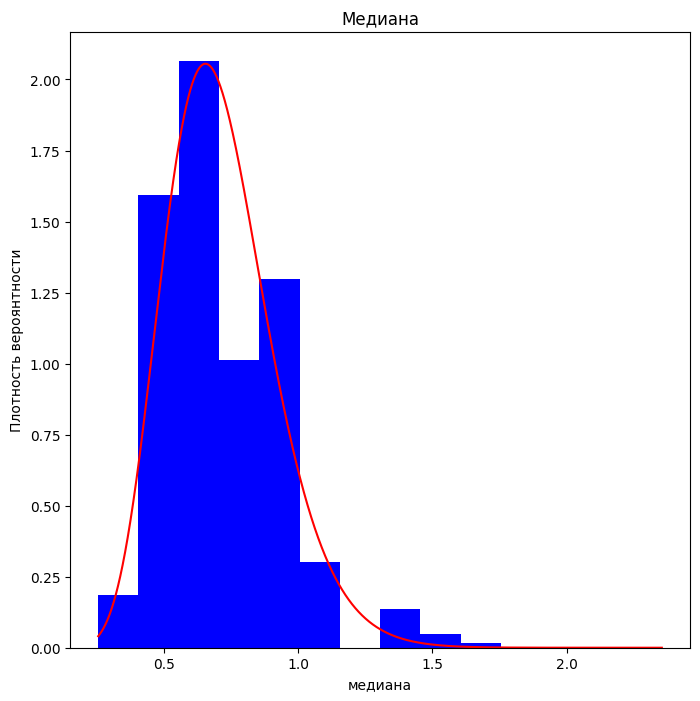

In [199]:
from turtle import color


bootstrap_medians = []

for _ in range(bootstrap_iteration):
    bootstrap_medians.append(np.median(np.random.choice(arr, size=len(arr), replace=True)))


x = np.linspace(min(bootstrap_medians), max(bootstrap_medians), bootstrap_iteration)
y = [cappa(x_i) for x_i in x]


plt.figure(figsize = (8, 8))
plt.hist(bootstrap_medians, bins=int(1 + np.log2(bootstrap_iteration)), color='b', density=True)
plt.plot(x, y, label='Нормальное распределение', color = 'r')
plt.xlabel('медиана')
plt.ylabel('Плотность вероянтности')
plt.title('Медиана')
print()